# 1. Importation de Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 2. Chargement de données

In [2]:
# import data
data = pd.read_csv("../data/USA_Housing.csv")


In [3]:
data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# 3. Exploration de données

In [4]:
data.shape

(5000, 7)

In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
data.drop(['Address'], axis=1, inplace=True)

In [9]:
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


# 4 Division de données en Variable Independante et Dependante

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values


In [11]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [12]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

# 5 Sepration de données Train data & Test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [14]:
#affichage de dimension
print("X train :", X_train.shape)
print("X train :", y_train.shape)

X train : (4000, 5)
X train : (4000,)


In [15]:
print("X train :", X_test.shape)
print("X train :", y_test.shape)

X train : (1000, 5)
X train : (1000,)


# 6 Création du modele

## 6.1 Linear Regression : Regression Lineaire

In [16]:
model_Lineaire = LinearRegression()


In [17]:
# Entrainement du modele
model_Lineaire.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model_Lineaire.predict(X_test)

In [19]:
df = pd.DataFrame({'Real Values': y_test, 'Prediction Values': y_pred})
df

,Real Values,Prediction Values
0,1.518387e+06,1.469131e+06
1,1.375057e+06,1.465964e+06
2,1.019128e+06,1.098770e+06
3,1.516075e+06,1.368393e+06
4,1.603046e+06,1.587980e+06
...,...,...
995,1.399980e+06,1.450746e+06
996,1.463443e+06,1.332175e+06
997,5.030655e+05,4.714764e+05
998,9.948971e+05,9.450020e+05


In [21]:
mean_squared_error(y_test, y_pred)

10522881577.700743

In [22]:
r2_score(y_test, y_pred)

0.9106183525382634

In [23]:
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
print("R2_Score :", r2_score(y_test, y_pred))

Mean Squared Error : 10522881577.700743
R2_Score : 0.9106183525382634


# Visualition de la prediction

In [26]:
# Visualisation des résultats
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

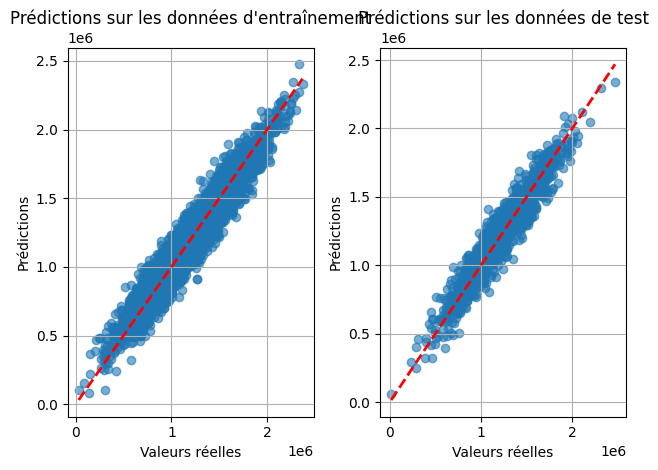

In [28]:
# Visualisation pour les données d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Prédictions sur les données d\'entraînement')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid()

# Visualisation pour les données de test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Prédictions sur les données de test')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid()

plt.tight_layout()
plt.show()